<a href="https://colab.research.google.com/github/wtfashwin/Industry-Oriented-Projects/blob/main/In_depth_Twitter_Retweet_Analysis.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [5]:
import pandas as pd
df = pd.read_csv('/content/In-Depth Twitter Retweet Analysis Dataset.csv')

In [6]:
print(df.head())
print(df.info())
print(df.isnull().sum())
print(df.describe())

   Unnamed: 0   weekday  hour  day lang  reach  retweetcount  likes  klout  \
0           0  Thursday    17   31   en     44             0      0     35   
1           1  Thursday    17   31   en   1810             5      0     53   
2           2  Thursday    17   31   en    282             0      0     47   
3           3  Thursday    17   31   en   2087             4      0     53   
4           4  Thursday    17   31   en    953             0      0     47   

   sentiment  locationid  isreshare  
0        0.0        3751          0  
1        2.0        3989          1  
2        0.0        3741          0  
3        0.0        3753          0  
4        0.0        3751          0  
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5000 entries, 0 to 4999
Data columns (total 12 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   Unnamed: 0    5000 non-null   int64  
 1   weekday       5000 non-null   object 
 2   hour          5000 

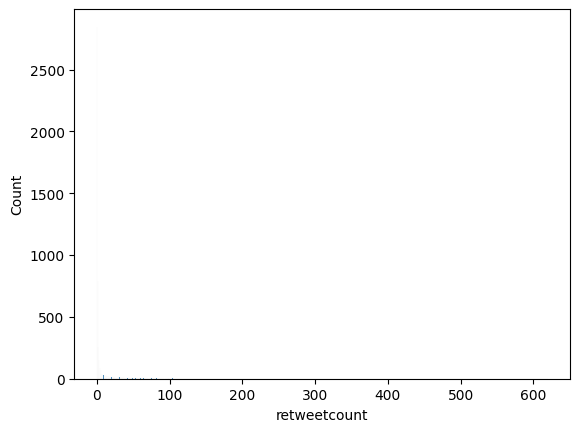

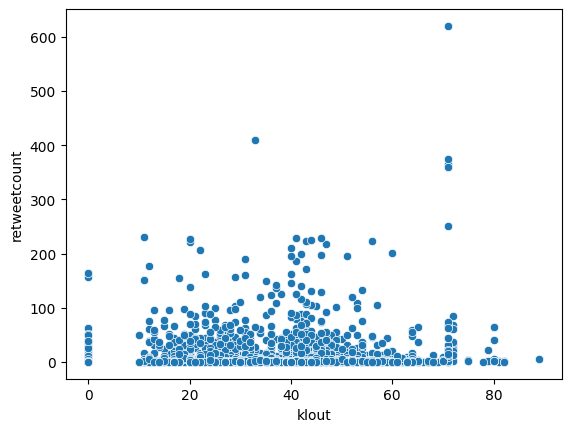

In [9]:
import matplotlib.pyplot as plt
import seaborn as sns
sns.histplot(df['retweetcount'])
plt.show()
sns.scatterplot(x='klout', y='retweetcount', data=df)
plt.show()

In [42]:
df['hour'] = pd.to_numeric(df['hour'])
df['day'] = pd.to_numeric(df['day'])
df['weekday'] = pd.Categorical(df['weekday'])

<Axes: title={'center': 'Retweets by Weekday'}, xlabel='weekday'>

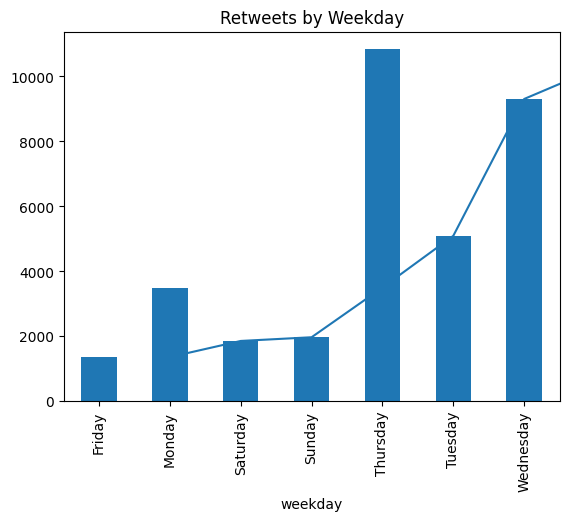

In [10]:
hourly_counts = df.groupby('hour')['retweetcount'].sum()
hourly_counts.plot(kind='bar', title='Retweets by Hour')
daily_counts = df.groupby('day')['retweetcount'].sum()
daily_counts.plot(kind='line', title='Retweets by Day')
weekly_counts = df.groupby('weekday')['retweetcount'].sum()
weekly_counts.plot(kind='bar', title='Retweets by Weekday')

In [12]:
peak_hours = hourly_counts.sort_values(ascending=False)
print(peak_hours.head())

hour
13    2474
20    2468
21    2331
11    2130
15    1939
Name: retweetcount, dtype: int64


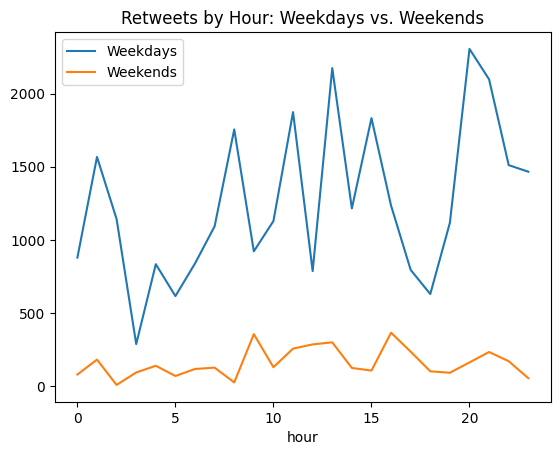

In [13]:
weekdays = df[df['weekday'].isin(['Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday'])]
weekends = df[df['weekday'].isin(['Saturday', 'Sunday'])]
weekday_counts = weekdays.groupby('hour')['retweetcount'].sum()
weekend_counts = weekends.groupby('hour')['retweetcount'].sum()
weekday_counts.plot(kind='line', label='Weekdays')
weekend_counts.plot(kind='line', label='Weekends')
plt.legend()
plt.title('Retweets by Hour: Weekdays vs. Weekends')
plt.show()

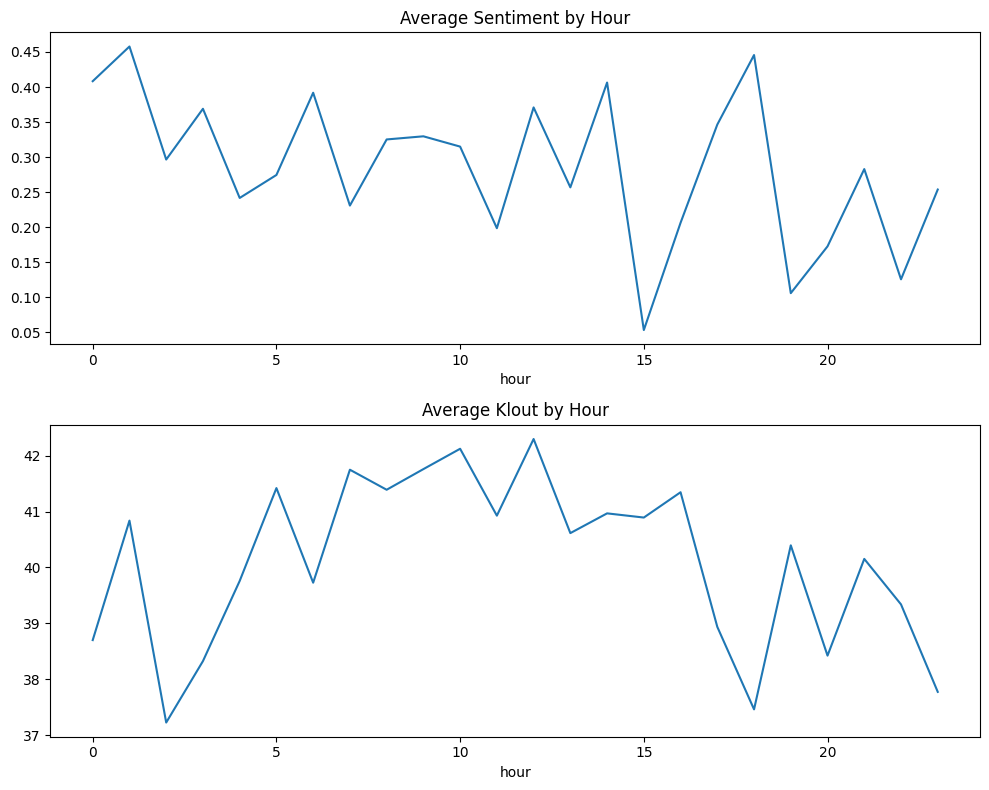

In [14]:
hourly_data = df.groupby('hour')[['sentiment', 'klout']].mean()
fig, axes = plt.subplots(2, 1, figsize=(10, 8))
hourly_data['sentiment'].plot(ax=axes[0], title='Average Sentiment by Hour')
hourly_data['klout'].plot(ax=axes[1], title='Average Klout by Hour')
plt.tight_layout()
plt.show()

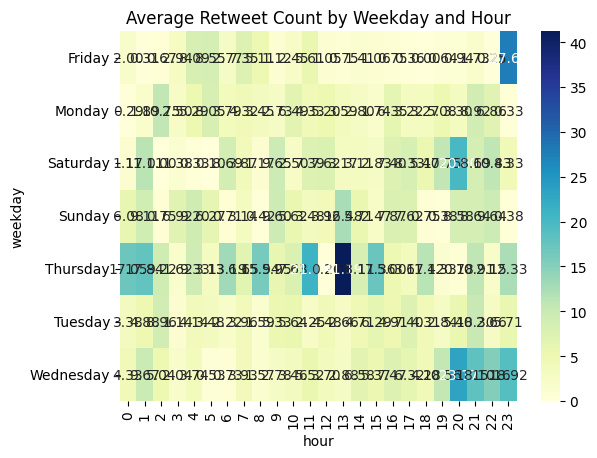

In [43]:
retweet_counts = df.pivot_table(values='retweetcount', index='weekday', columns='hour', aggfunc='mean')

# Creating a heatmap
sns.heatmap(retweet_counts, annot=True, fmt='.2f', cmap='YlGnBu')
plt.title('Average Retweet Count by Weekday and Hour')
plt.show()

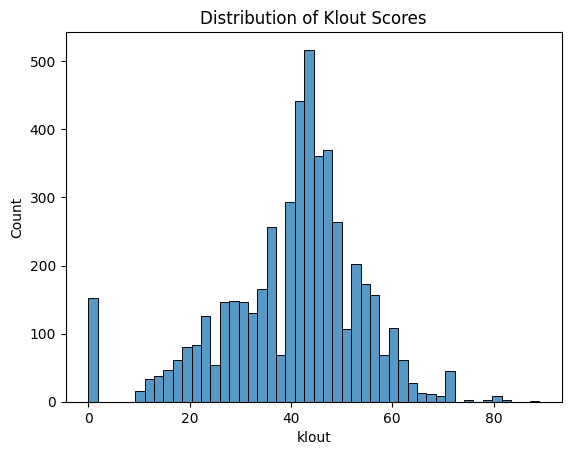

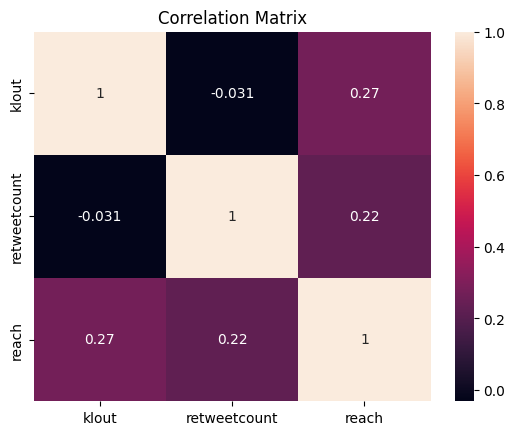

In [34]:
sns.histplot(df['klout'])
plt.title('Distribution of Klout Scores')
plt.show()

correlation_matrix = df[['klout', 'retweetcount', 'reach']].corr()
sns.heatmap(correlation_matrix, annot=True)
plt.title('Correlation Matrix')
plt.show()


In [18]:
location_counts = df.groupby('locationid')['retweetcount'].sum().sort_values(ascending=False)
print(location_counts.head())

locationid
3751    5867
800     1470
3019    1281
2641     934
1329     840
Name: retweetcount, dtype: int64


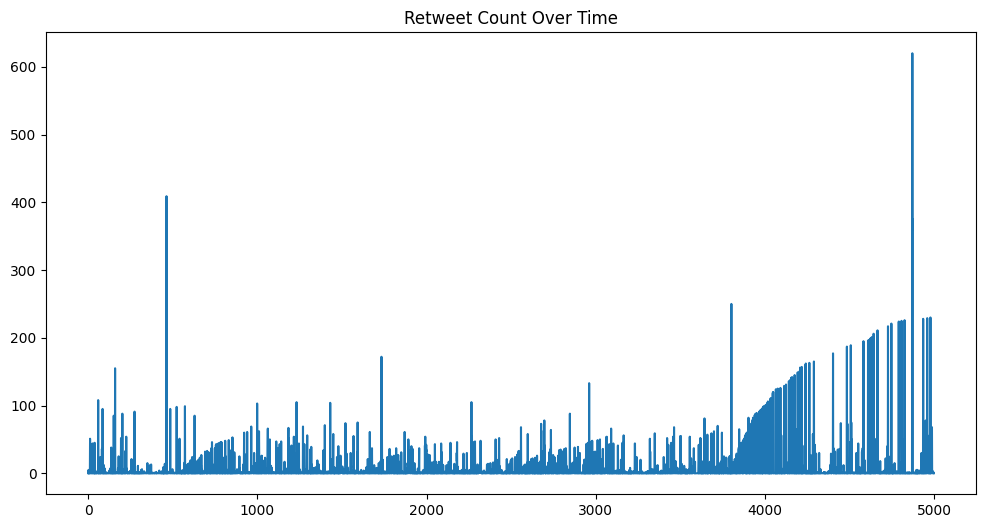

        Unnamed: 0         hour         day          reach  retweetcount  \
count  5000.000000  5000.000000  5000.00000    5000.000000   5000.000000   
mean   2499.500000    11.704800     5.23380    6214.053800      6.785200   
min       0.000000     0.000000     1.00000       0.000000      0.000000   
25%    1249.750000     7.000000     4.00000     157.000000      0.000000   
50%    2499.500000    12.000000     5.00000     431.000000      0.000000   
75%    3749.250000    16.000000     6.00000    1379.250000      2.000000   
max    4999.000000    23.000000    31.00000  447610.000000    620.000000   
std    1443.520003     6.224099     3.92426   40323.009957     25.084164   

             likes        klout    sentiment   locationid    isreshare  \
count  5000.000000  5000.000000  5000.000000  5000.000000  5000.000000   
mean      0.167400    40.388000     0.278500  2897.594000     0.317000   
min       0.000000     0.000000    -4.000000     2.000000     0.000000   
25%       0.000000 

In [36]:
df['retweetcount'].plot(figsize=(12, 6))
plt.title('Retweet Count Over Time')
plt.show()

print(df.describe())


In [35]:
import datetime

def create_timestamp(row):
    weekday_mapping = {'Monday': 1, 'Tuesday': 2, 'Wednesday': 3,
                       'Thursday': 4, 'Friday': 5, 'Saturday': 6, 'Sunday': 7}
    # Convert weekday string to integer
    weekday_int = weekday_mapping.get(row['weekday'], 1)  # Default to 1 if not found

    return datetime.datetime(year=2023,
                             month=1,
                             day=weekday_int,  # Use the integer representation
                             hour=row['hour'],
                             minute=row['day'])

df['timestamp'] = df.apply(create_timestamp, axis=1)

In [48]:

df['engagement_rate'] = (df['retweetcount'] + df['likes']) / df['klout']

influencers = df.sort_values(by=['retweetcount', 'klout', 'engagement_rate'], ascending=False)

print(influencers.head(10))


      Unnamed: 0    weekday  hour  day lang   reach  retweetcount  likes  \
4872        4872   Thursday    13    7   en  447244           620      0   
462          462     Friday    23    1   en     130           409      0   
4874        4874   Thursday    13    7   en  447244           375      0   
4871        4871   Thursday    13    7   en  447244           366      0   
4873        4873   Thursday    13    7   en  447244           359      0   
3802        3802  Wednesday    19    6   en  447155           250      0   
4979        4979   Thursday    15    7   en       2           230      0   
4960        4960   Thursday    15    7   en    1504           229      0   
4936        4936   Thursday    14    7   en     190           228      0   
4826        4826   Thursday    11    7   en      36           226      0   

      klout  sentiment  locationid  isreshare  engagement_rate  
4872     71   0.000000        3751          0         8.732394  
462      33   2.000000        381

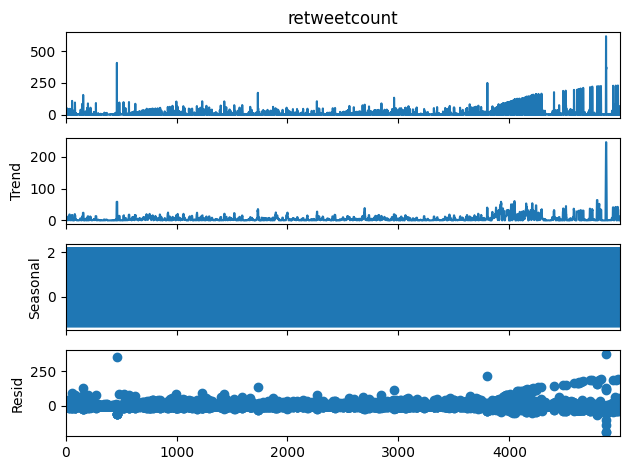

In [49]:
from statsmodels.tsa.seasonal import seasonal_decompose

decomposition = seasonal_decompose(df['retweetcount'], model='additive', period=7)  # Assuming weekly seasonality

# Plot the decomposition
decomposition.plot()
plt.show()


In [50]:
def is_weekend(weekday):
  return weekday in ['Saturday', 'Sunday']

df['is_weekend'] = df['weekday'].apply(is_weekend)

correlation = df[['is_weekend', 'retweetcount']].corr()
print(correlation)

              is_weekend  retweetcount
is_weekend      1.000000     -0.017889
retweetcount   -0.017889      1.000000
